Utilizar o conjunto de dados Titanic.

Entregáveis:
* Conjunto de teste não utilizado no treinamento
* Análise dos resultados (porque escolheu esse modelo, como foi a avaliação, etc)
* Utilizar FastAPI para fazer o predict de cada amostra individualmente

Dicas:
* Realizar limpeza dos dados
* Realizar experimentos utilizando normalização, padronização e dados brutos
* Fazer categorização dos dados. Se fizer categorização, realizar experimentos utilizando OneHotEncoding
* Realizer experimentos selecionando atributos
* Utilizar técnicas de otimização de hiperparametros


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df_test = pd.read_csv("datasets/test.csv")
df_train = pd.read_csv("datasets/train.csv")
df_test_surv = pd.read_csv('datasets/gender_submission.csv')

In [59]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [61]:
df_test_surv

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
df_test.Age

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [63]:
survive = df_test_surv.iloc[:,1]
survive

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [64]:
df_test.insert(1,'Survived',survive)

In [65]:
df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [66]:
df_concat = pd.concat((df_train,df_test))
df_concat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
# df_titanic_full = df_concat.values.tolist()
# for i,v in enumerate(df_titanic_full):
#     if v[2] == 3:
#         df_titanic_full[i][2] = "Lower"
#     elif v[2] == 2:
#         df_titanic_full[i][2] = "Middle"
#     elif v[2] == 1:
#         df_titanic_full[i][2] = "Upper"
# for i,v in enumerate(df_titanic_full):
#     if v[5] <= 18:
#         df_titanic_full[i][5] = "Criança"
#     elif v[5] <= 65 and v[5] > 18:
#         df_titanic_full[i][5] = "Adulto"
#     elif v[5] > 65:
#         df_titanic_full[i][5] = "Idoso"

In [68]:
df_titanic = pd.DataFrame(df_concat, columns=['PassengerId','Pclass','Name', 'Sex', 'Age','Survived'])
df_titanic

,PassengerId,Pclass,Name,Sex,Age,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0
...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0


<BarContainer object of 1309 artists>

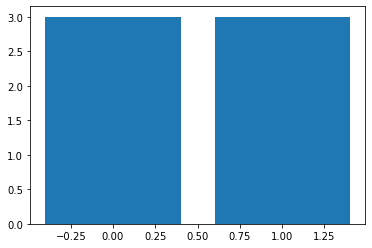

In [69]:
plt.bar(surv,classes)